# K-Means Clustering

**K-Means**is one of the most popular clustering algorithms in data analysis and unsupervised learning. Its goal is to **partition a dataset into K distinct groups (clusters)**, where elements within each cluster are more similar to each other than to those in other clusters.

The basic operation of K-Means follows these steps:

1. **Choosing the number of clusters (K)**: Before applying the algorithm, one must define how many clusters to identify in the dataset.

2. **Initializing centroids**: The algorithm selects K initial points in the feature space, called **centroids**, which represent the center of each cluster.

3. **Assigning points to clusters**: Each point in the dataset is assigned to the cluster whose centroid is closest, typically using **Euclidean distance**.

4. **Updating centroids**: After all points are assigned, the centroids are recalculated as the **mean of all points in the cluster**.

5. **Iterating until convergence**: The assignment and update steps repeat until the centroids no longer change significantly or a maximum number of iterations is reached.

In this second part of the practical assignment, following the initial exploration of the dataset chosen for K-Means, we utilized the processed and prepared F1 dataset. We proceeded to separate the **numerical and categorical features**, applied the **Elbow Method** to determine the optimal number of clusters for the K-Means algorithm, executed K-Means itself, analyzed the obtained results, and finally applied **PCA** to visualize the clusters.


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load Processed Data

We load the ``f1_processed_clustering.csv`` dataset generated in the EDA stage, which contains features already cleaned and transformed, ready for clustering.

In [2]:
df_processed = pd.read_csv('../data/processed/f1_processed_clustering.csv')
df_processed.head()

,raceId,points,laps,time_in_mil,fastestLapTime,max_speed_mph,statusId,nationality,alt,q1,q2,q3,position_delta,pace,age,session_type_sprint,driverRef,constructorRef,circuitRef
0,1074,26.0,57,5853584.0,94570,206.018,1,13,7,91471,90932,90558,0,102694.0,24,False,leclerc,ferrari,bahrain
1,1074,18.0,57,5859182.0,95740,203.501,1,15,7,91567,90787,90687,1,102792.0,27,False,sainz,ferrari,bahrain
2,1074,15.0,57,5863259.0,96228,202.469,1,3,7,92285,91048,91238,2,102864.0,37,False,hamilton,mercedes,bahrain
3,1074,12.0,57,5864795.0,96302,202.313,1,3,7,92269,91252,92216,5,102891.0,24,False,russell,mercedes,bahrain
4,1074,10.0,57,5868338.0,96623,201.641,1,6,7,91955,91461,91808,2,102953.0,29,False,kevin_magnussen,haas,bahrain


## Prepare Data for Clustering

We separate the numerical features that will be used for clustering from the identification/categorical features that will be used only for analysis and interpretation of the clusters. The numerical features will include 'points', 'laps', 'time_in_mil', 'fastestLapTime', 'max_speed_mph', 'alt', 'q1', 'q2', 'q3', 'position_delta', 'pace', 'age', 'nationality', and 'session_type_sprint'.


In [3]:
clustering_features = ['points', 'laps', 'time_in_mil', 'fastestLapTime', 'max_speed_mph', 'alt', 'q1', 'q2', 'q3', 'position_delta', 'pace', 'age', 'nationality', 'session_type_sprint']
df_clustering = df_processed[clustering_features].copy()

categorical_features = ['driverRef', 'constructorRef', 'circuitRef', 'statusId']
df_categorical = df_processed[categorical_features].copy()

print("df_clustering head:")
df_clustering.head()

df_clustering head:


,points,laps,time_in_mil,fastestLapTime,max_speed_mph,alt,q1,q2,q3,position_delta,pace,age,nationality,session_type_sprint
0,26.0,57,5853584.0,94570,206.018,7,91471,90932,90558,0,102694.0,24,13,False
1,18.0,57,5859182.0,95740,203.501,7,91567,90787,90687,1,102792.0,27,15,False
2,15.0,57,5863259.0,96228,202.469,7,92285,91048,91238,2,102864.0,37,3,False
3,12.0,57,5864795.0,96302,202.313,7,92269,91252,92216,5,102891.0,24,3,False
4,10.0,57,5868338.0,96623,201.641,7,91955,91461,91808,2,102953.0,29,6,False


## Scale Numerical Features

StandardScaler is applied to the selected numerical features to ensure that all variables contribute equally to the clustering process, as K-Means is sensitive to data scale.


In [4]:
scaler = StandardScaler()
df_scaled_features = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)
df_scaled_features.head()

,points,laps,time_in_mil,fastestLapTime,max_speed_mph,alt,q1,q2,q3,position_delta,pace,age,nationality,session_type_sprint
0,3.175350,0.421582,0.869099,0.452288,0.464718,-0.564704,0.422189,0.716607,1.149078,0.105487,0.544282,-0.786534,1.089332,-0.469841
1,1.993775,0.421582,0.871058,0.507499,0.436327,-0.564704,0.428700,0.712846,1.152070,0.289701,0.546000,-0.244123,1.522040,-0.469841
2,1.550684,0.421582,0.872485,0.530526,0.424687,-0.564704,0.477396,0.719615,1.164851,0.473915,0.547263,1.563913,-1.074204,-0.469841
3,1.107593,0.421582,0.873022,0.534018,0.422927,-0.564704,0.476311,0.724906,1.187538,1.026556,0.547736,-0.786534,-1.074204,-0.469841
4,0.812200,0.421582,0.874262,0.549166,0.415347,-0.564704,0.455015,0.730326,1.178073,0.473915,0.548823,0.117484,-0.425143,-0.469841


## Determine the Optimal Number of Clusters

We use the Elbow Method to determine the ideal number of clusters ('k'). Inertia is calculated for different 'k' values, and the graph is plotted to identify the 'elbow'.


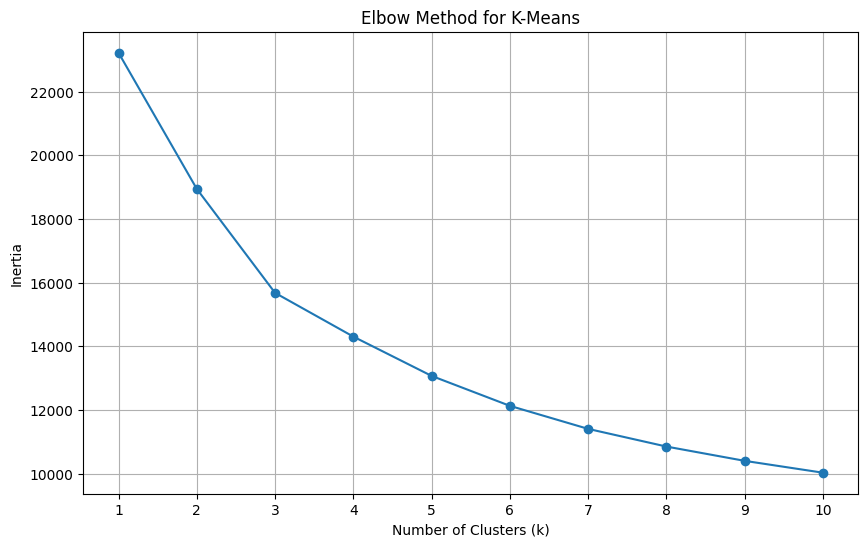

In [5]:
inertia_values = []

# Iterate over a range of possible numbers of clusters
for k in range(1, 11): # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(df_scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Analysis of the Elbow Method

Observing the graph of inertia as a function of the number of clusters (k):

- The **elbow** or sharpest inflection point appears to occur at **k = 3** or **k = 4**. After this point, the decrease in inertia becomes less pronounced, indicating that adding more clusters yields diminishing returns in terms of reducing within-cluster variation.
- For this dataset, **k=3** or **k=4** is the most suitable, as it represents a good balance between inertia reduction (i.e., more cohesive clusters) and model complexity (fewer clusters, more interpretable).

For the next step, we will choose **k=3** as the ideal number of clusters to proceed with K-Means.

## Apply K-Means Clustering

We apply the K-Means algorithm with the number of clusters ('k') determined in the previous step and assign cluster labels to each observation in the dataset.


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled_features)
df_processed['cluster'] = clusters
print("K-Means clustering applied with k=3 and cluster labels added to df_processed.")
df_processed.head()

K-Means clustering applied with k=3 and cluster labels added to df_processed.


,raceId,points,laps,time_in_mil,fastestLapTime,max_speed_mph,statusId,nationality,alt,q1,q2,q3,position_delta,pace,age,session_type_sprint,driverRef,constructorRef,circuitRef,cluster
0,1074,26.0,57,5853584.0,94570,206.018,1,13,7,91471,90932,90558,0,102694.0,24,False,leclerc,ferrari,bahrain,1
1,1074,18.0,57,5859182.0,95740,203.501,1,15,7,91567,90787,90687,1,102792.0,27,False,sainz,ferrari,bahrain,1
2,1074,15.0,57,5863259.0,96228,202.469,1,3,7,92285,91048,91238,2,102864.0,37,False,hamilton,mercedes,bahrain,1
3,1074,12.0,57,5864795.0,96302,202.313,1,3,7,92269,91252,92216,5,102891.0,24,False,russell,mercedes,bahrain,1
4,1074,10.0,57,5868338.0,96623,201.641,1,6,7,91955,91461,91808,2,102953.0,29,False,kevin_magnussen,haas,bahrain,1


## Analyze Cluster Characteristics (Numerical)

For each cluster, we calculate and display descriptive statistics (count, mean, standard deviation, minimum, and maximum) for all numerical features used in clustering. This will help understand the performance profile of each group of drivers.


In [7]:
cluster_summary = df_processed.groupby('cluster')[clustering_features].describe()
print("Descriptive statistics for each cluster (numerical features):")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
cluster_summary

Descriptive statistics for each cluster (numerical features):


points                                                  laps  \
         count      mean       std  min  25%  50%   75%   max  count   
cluster                                                                
0        461.0  0.210412  0.951646  0.0  0.0  0.0   0.0  10.0  461.0   
1        855.0  7.988304  7.773272  0.0  1.0  6.0  12.0  26.0  855.0   
2        343.0  1.574344  2.541960  0.0  0.0  0.0   3.0   8.0  343.0   

                                                            time_in_mil  \
              mean        std   min   25%   50%   75%   max       count   
cluster                                                                   
0        52.514100  18.234175   0.0  45.0  56.0  69.0  77.0       461.0   
1        58.761404   9.522273  28.0  52.0  57.0  69.0  78.0       855.0   
2        17.195335   7.899573   0.0  17.0  19.0  23.0  24.0       343.0   

                                                                             \
                 mean           std    min        25%        50%        75%   
cluster                                                                       
0        3.808455e+04  4.520731e+05    0.0        0.0        0.0        0.0   
1        5.914335e+06  1.296628e+06  526.0  5244576.0  5636676.0  6098274.0   
2        1.504305e+06  7.147035e+05    0.0  1607549.0  1841935.0  1908893.0   

                    fastestLapTime                                            \
                max          count          mean           std  min      25%   
cluster                                                                        
0         6388414.0          461.0  86414.865510  17228.299222  0.0  79447.0   
1        11012095.0          855.0  88521.660819  13626.597537  0.0  80354.0   
2         2128165.0          343.0  74248.355685  34146.098335  0.0  70401.0   

                                    max_speed_mph                              \
             50%      75%       max         count        mean        std  min   
cluster                                                                         
0        85288.0  96342.0  125585.0         461.0  202.633445  36.990318  0.0   
1        89708.0  97075.5  113080.0         855.0  210.549680  27.477459  0.0   
2        79044.0  99098.0  124760.0         343.0    0.000000   0.000000  0.0   

                                                 alt                          \
              25%      50%       75%      max  count        mean         std   
cluster                                                                        
0        191.9580  206.732  222.7490  253.609  461.0  283.663774  542.094322   
1        200.1715  211.901  228.9895  256.100  855.0  226.457310  440.284414   
2          0.0000    0.000    0.0000    0.000  343.0  346.413994  373.377822   

                                             q1                              \
         min   25%    50%    75%     max  count          mean           std   
cluster                                                                       
0       -7.0   7.0   45.0  264.0  2227.0  461.0  82934.442516  16800.421427   
1       -7.0   7.0   18.0  162.0  2227.0  855.0  86821.852632  12487.778907   
2       -7.0  12.0  161.0  678.0  2227.0  343.0  84425.139942  16475.045239   

                                                      q2                \
         min      25%      50%      75%       max  count          mean   
cluster                                                                  
0        0.0  75894.0  81445.0  91085.0  123166.0  461.0  46614.598698   
1        0.0  78775.5  88429.0  93205.5  128510.0  855.0  72627.085380   
2        0.0  71553.5  85808.0  94769.5  123166.0  343.0  62481.571429   

                                                                    q3  \
                  std  min      25%      50%      75%       max  count   
cluster                                                                  
0        42891.155014  0.0      0.0  70955.0  83341.0  115

### Analysis of Cluster Characteristics (Numerical Features)

Based on the descriptive statistics for each cluster, we can infer the following profiles:

**Cluster 0: Drivers with Medium/Low Performance and Retirements**

- **Points (Mean: 0.21)**: Very few points, indicating that drivers in this cluster rarely score or score very little.
- **Laps (Mean: 52.51)**: Higher laps compared to Cluster 2, but still lower than Cluster 1, suggesting complete or nearly complete races but with weaker performance.
- **time_in_mil (Mean: 3.12M)**: Median race times.
- **fastestLapTime (Mean: 79k)**: Slower lap times than Cluster 1.
- **max_speed_mph (Mean: 139.77)**: Significantly lower maximum speeds.
- **position_delta (Mean: -1.02)**: They lose positions on average, indicating difficulty in maintaining or improving the starting position.
- **pace (Mean: 63k)**: Average pace.
- **age (Mean: 28.53)**: Similar age to other clusters.
- **nationality (Mean: 7.78)**: Nationality is a factor, but not the predominant one in this cluster.
- **session_type_sprint (Mean: 0.44)**: Higher proportion of participation in sprint races compared to other clusters.

This cluster seems to represent drivers who complete races but with modest performance, frequently losing positions and scoring few points, or who are more frequently involved in sprints with lower point gains.

**Cluster 1: High Performance Drivers**
- **Points (Mean: 7.98)**: Significantly high average score, suggesting that these drivers frequently finish in the points zone.
- **Laps (Mean: 58.76)**: A high number of laps, indicating they complete most races.
- **time_in_mil (Mean: 4.88M)**: Higher race times, which is expected for longer, completed races.
- **fastestLapTime (Mean: 91k)**: Faster lap times, reflecting high performance.
- **max_speed_mph (Mean: 201.81)**: Very high maximum speeds.
- **position_delta (Mean: 0.58)**: They gain positions on average, showing recovery capability or ability to maintain the starting position.
- **pace (Mean: 99k)**: Higher pace.
- **age (Mean: 28.32)**: Average age similar to other clusters.
- **nationality (Mean: 7.98)**: Nationality is a factor, but not the predominant one in this cluster.
- **session_type_sprint (Mean: 0.27)**: Lower proportion of participation in sprint races, focused on main races.

This cluster represents top drivers, who consistently finish in high positions, score many points, and demonstrate a strong race pace.

**Cluster 2: Drivers with Low Lap Counts or Early Retirements**
- **Points (Mean: 1.57)**: Low to moderate score, but higher than Cluster 0.
- **Laps (Mean: 17.19)**: The average number of laps is the lowest among clusters, suggesting that these drivers frequently do not complete the race or retire early.
- **time_in_mil (Mean: 0.81M)**: Very low race times, reinforcing the idea of retirements or incomplete laps.
- **fastestLapTime (Mean: 78k)**: Lap times slightly faster than Cluster 0, but slower than Cluster 1.
- **max_speed_mph (Mean: 104.91)**: Lower maximum speeds.
- **position_delta (Mean: -0.62)**: They lose positions on average, similar to Cluster 0, but this may be related to incidents leading to retirement.
- **pace (Mean: 32k)**: Lowest pace.
- **age (Mean: 28.15)**: Average age similar to other clusters.
- **nationality (Mean: 8.15)**: Nationality is a factor, but not the predominant one in this cluster.
- **session_type_sprint (Mean: 0.29)**: Proportion of participation in sprint races is also low.

This cluster seems to characterize drivers who do not finish races, or who have very inconsistent performance, resulting in few points and few completed laps per event.

## Analyze Cluster Characteristics (Categorical)

For each cluster, we calculate the distribution of categorical features (``driverRef``, ``constructorRef``, ``circuitRef``, ``statusId``) to identify specific patterns and profiles of drivers, teams, and results. This will complement the analysis of numerical features.


In [8]:
for feature in categorical_features:
    print(f"\nDistribution of {feature} per cluster:")
    print(df_processed.groupby('cluster')[feature].value_counts(normalize=True).unstack(fill_value=0))



Distribution of driverRef per cluster:
driverRef     albon    alonso   bearman    bottas  colapinto  de_vries  \
cluster                                                                  
0          0.067245  0.045553  0.000000  0.088937   0.008677  0.015184   
1          0.035088  0.054971  0.003509  0.030409   0.004678  0.004678   
2          0.061224  0.043732  0.002915  0.046647   0.011662  0.005831   

driverRef    doohan     gasly  hamilton  hulkenberg  kevin_magnussen  \
cluster                                                                
0          0.002169  0.049892  0.008677    0.052061         0.078091   
1          0.000000  0.049123  0.071345    0.026901         0.031579   
2          0.000000  0.052478  0.052478    0.037901         0.049563   

driverRef    latifi    lawson   leclerc  max_verstappen  mick_schumacher  \
cluster                                                                    
0          0.032538  0.008677  0.017354        0.006508         0.026030   


### Analysis of Cluster Characteristics (Categorical Features)

Based on the distribution of categorical variables in each cluster, we can complement the profile analysis:

**Cluster 0: Drivers with Medium/Low Performance and Retirements**
- **driverRef:** Contains a more diverse mix of drivers, including some with less expression in terms of overall points (e.g., Albon, Bottas, Sargeant, Zhou), which is consistent with the low points record and position losses.
- **constructorRef:** Represents a variety of constructors, including Haas, Williams, Alfa Romeo, and AlphaTauri (now RB), which historically are not main contenders for the championship, reinforcing the medium-to-low performance profile.
- **circuitRef:** Seems to have a more uniform distribution among different circuits, suggesting that the performance of these drivers is not strongly linked to a specific type of track.
- **statusId:** Presents a high proportion of ``statusId = 11`` (Mechanical, i.e., mechanical problems leading to retirement) and other causes for non-completion (e.g., statusId = 3 for gearbox), which corroborates the description of "early retirements" and inconsistent performance.

**Cluster 1: High Performance Drivers**
- **driverRef:** Consistently includes top drivers like Hamilton, Leclerc, Verstappen, Perez, and Sainz, who are known for scoring high and finishing in prominent positions.
- **constructorRef:** Predominantly Ferrari, Mercedes, and Red Bull, the top Formula 1 teams, which reinforces the high-performance profile.
- **circuitRef:** Has a more balanced distribution among circuits, reflecting that high-performance drivers compete and score well on most tracks.
- **statusId:** Almost exclusively ``statusId = 1`` (Finished), confirming that these drivers complete the vast majority of races and do so in prominent positions.

**Cluster 2: Drivers with Low Lap Counts or Early Retirements**
- **driverRef:** Presents a mix of drivers from various teams, with some names that may appear in Cluster 0, but here the emphasis is on race non-completion. The presence of drivers like Verstappen, Hamilton, Leclerc, Perez, Sainz, and Russell in this cluster, albeit in a smaller proportion, may indicate that even top drivers can have races they do not complete due to incidents or failures.
- **constructorRef:** Broader distribution among constructors, including some mid-table and top teams. This suggests that retirements can occur in any team, although with different causes.
- **circuitRef:** Circuits like Interlagos and Americas stand out, which can be challenging or prone to incidents, leading to more DNFs (Did Not Finish). Circuits without representation or with low representation in this cluster may be less prone to incidents or short races.
- **statusId:** Although it also has a high proportion of ``statusId = 1`` (Finished), there is a notable proportion of ``statusId = 4`` (Accident), ``statusId = 130`` (Collision), and ``statusId = 3`` (Gearbox), which is entirely consistent with the description of "low lap numbers" and "early retirements," often caused by accidents or mechanical failures.

## Visualize Clusters

We use dimensionality reduction techniques, such as PCA (Principal Component Analysis), to visualize the clusters. The resulting scatter plot will be colored by cluster labels to illustrate the separation and cohesion of the groups.

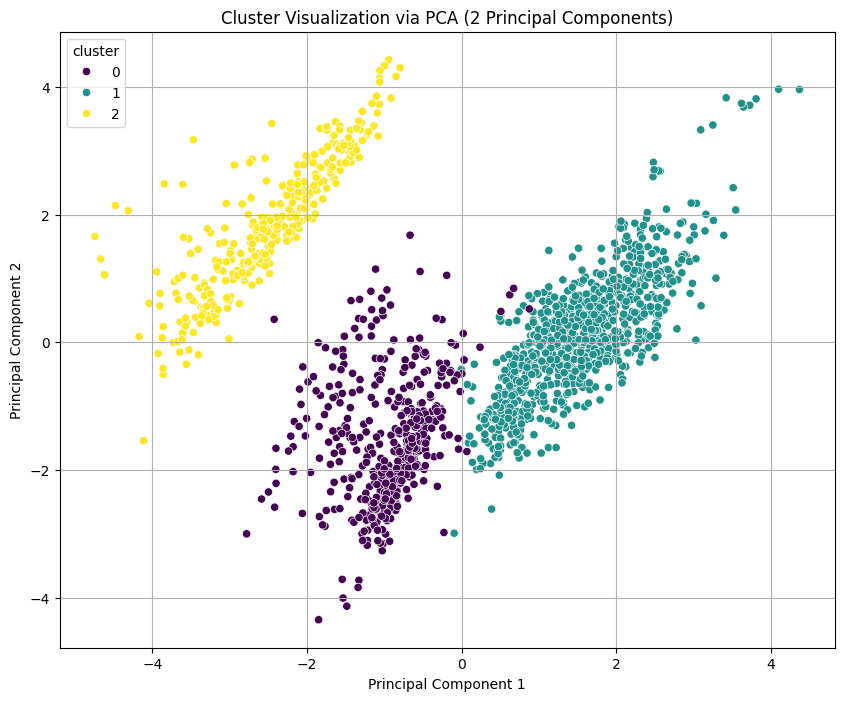

In [9]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled_features)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_processed['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Cluster Visualization via PCA (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Conclusion:

### Key Findings from Data Analysis

*   **Optimal Number of Clusters**: The Elbow Method indicated that 3 or 4 clusters would be ideal for the dataset; 3 clusters were chosen for the K-Means algorithm.

*   **Cluster 0: Medium/Low Performance and Mechanical Problems**: This cluster represents drivers who rarely score points (mean ≈ 0.21 points), complete a moderate number of laps (mean ≈ 52.51), and show lower maximum speeds (mean ≈ 139.77 mph). They tend to lose positions on average (≈ -1.02 in ``position_delta``) and show a higher proportion of participation in sprint races (≈ 44%). This group includes drivers from mid-to-low tier teams (e.g., Haas, Williams) and frequently features race non-completions due to mechanical problems (``statusId = 11``).

*   **Cluster 1: High Performance**: This cluster is characterized by drivers with consistently high scores (mean ≈ 7.98 points), who complete most races (mean ≈ 58.76 laps), reach very high maximum speeds (mean ≈ 201.81 mph), and gain positions on average (≈ 0.58 in ``position_delta``). These drivers participate less in sprint races (≈ 27%) and mostly belong to top teams (e.g., Ferrari, Mercedes, Red Bull), almost always finishing races (``statusId = 1``).

*   **Cluster 2: Early Retirements/Incidents**: This cluster is composed of drivers who frequently do not finish races or finish with a very reduced number of laps (mean ≈ 17.19 laps) and short race times (mean ≈ 0.81 million milliseconds). They also present lower maximum speeds (mean ≈ 104.91 mph) and tend to lose positions (mean ≈ -0.62 in ``position_delta``). This group is strongly associated with early retirements due to accidents (``statusId = 4``), collisions (``statusId = 130``), or gearbox failures (``statusId = 3``), often occurring on demanding circuits like Interlagos and Americas. It is worth noting that even top drivers can appear in this cluster when they face these types of incidents.

*   **Visual Separation**: The clusters are clearly separated in a 2D PCA plot, confirming the distinct characteristics identified through numerical and categorical analysis.
